In [12]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats
import statsmodels.api as stm


In [19]:
data = pd.read_csv('houses.csv')
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
5,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
6,6865200140,20140529T000000,485000.0,4,1.00,1600,4300,1.5,0,0,...,7,1600,0,1916,0,98103,47.6648,-122.343,1610,4300
7,6300500875,20140514T000000,385000.0,4,1.75,1620,4980,1.0,0,0,...,7,860,760,1947,0,98133,47.7025,-122.341,1400,4980
8,7137970340,20140703T000000,285000.0,5,2.50,2270,6300,2.0,0,0,...,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005
9,8091400200,20140516T000000,252700.0,2,1.50,1070,9643,1.0,0,0,...,7,1070,0,1985,0,98030,47.3533,-122.166,1220,8386


## Simple linear regression

In [38]:
X = data[["sqft_living15"]]
y = data["price"]

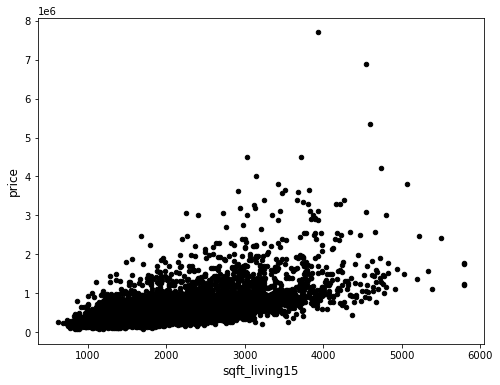

In [6]:
data.plot(kind='scatter', x='sqft_living15', y='price', color='black', figsize=(8,6))
plt.ylabel('price', fontsize=12)
plt.xlabel('sqft_living15', fontsize=12)
plt.show()

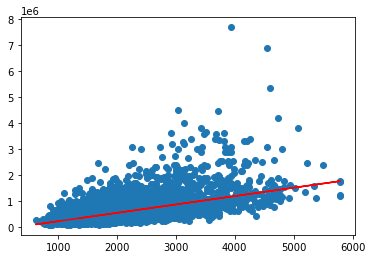

In [10]:
# fit and plot using sklearn

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, y)  # perform linear regression
y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [39]:
# Use stats model to get detailed regression results

X = stm.add_constant(X)


In [43]:
regr = stm.OLS(y, X)
type(regr)

statsmodels.regression.linear_model.OLS

In [44]:
results = regr.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     5072.
Date:                Thu, 24 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:22:13   Log-Likelihood:            -1.3720e+05
No. Observations:                9761   AIC:                         2.744e+05
Df Residuals:                    9759   BIC:                         2.744e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.006e+05   9555.994    -10.532

In [45]:
results.params

const           -100639.199382
sqft_living15       322.920681
dtype: float64

In [ ]:
# coefficients
# include b0 if for x = 0, we want y to be 0 or some constant
# b0 = -100600
# b1 = 322.9207

# F test p value implies atleast one variable is not 0, hence significant

# Both b0 and b1 are statistically significant in t test

# DF residuals: Degrees of freedom of the residuals. Number of observations – number of parameters

# DF model: Number of parameters in the model (not including the constant term if present)

# Log likelihood is -1.3720e+05 which is not good, since we want to maximize it, but this is a very less value

#  AIC score: is high which is not good. relative quality of statistical models for a given dataset, so only use for 
# comparison. The Akaike Information Criterion.
# Adjusts the log-likelihood based on the number of observations and the complexity of the model.

# BIC score: The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more 
# parameters.

# R^2, adj r^2 value is 0.342 which is decent, since higher the better

# The lower and upper values of the 95% confidence interval  

# Condition mumber: One way to assess multicollinearity is to compute the condition number. Values over 30 are worrisome.
# When we have multicollinearity, we can expect much higher fluctuations to small changes in the data,

# Durbin-Watson – tests for homoscedasticity (characteristic #3). We hope to have a value between 1 and 2. This means that the 
# variance of the errors is consistent across the entire dataset. We want to avoid situations where the error rate grows in
# a particular direction

# Skewness: A measure of the symmetry of the residuals about the mean. Normally-distributed errors should be symmetrically 
# distributed about the mean (equal amounts above and below the line). Want close to 0 here.

# Kurtosis: A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away 
# from the mean (in the tails). Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, 
# implying a better model with few outliers.

# Omnibus: test of the skewness and kurtosis of the residual. We hope to see a value close to zero which would indicate 
# normality.

# Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. 
# We hope to see something close to 1 here

# Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a
# confirmation of the Omnibus test. In this case we do.

# Confidence interval is for parameters, Prediction interval is for each point

## Confidence interval

In [47]:
# Prediction interval for new data
new_data = stm.add_constant([102, 1032, 1040, 105])
results_pred = results.get_prediction(new_data)
results_pred.conf_int()


array([[-85578.46149722, -49824.1182455 ],
       [222118.8277289 , 243111.06007927],
       [224759.93221381, 245636.68649802],
       [-84584.64313121, -48880.41252263]])

In [55]:
print(results_pred.conf_int())

## Prediction interval

In [53]:
# Prediction interval for existing data
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(results)

print("stdev: ",prstd)
print("CI low: ",iv_l)
print("CI up: ", iv_u)

stdev:  [307907.15703444 308149.42727242 307908.45371503 ... 307893.91815287
 307925.37090269 307925.37090269]
CI low:  0      -265028.867827
1       832426.549361
2      -274719.030033
3      -129378.964446
4      -261798.839931
            ...      
9756   -252108.834765
9757    109567.071953
9758    -42187.646656
9759   -374857.602483
9760   -374857.602483
Length: 9761, dtype: float64
CI up:  0       9.420947e+05
1       2.040500e+06
2       9.324096e+05
3       1.077698e+06
4       9.453231e+05
            ...     
9756    9.550083e+05
9757    1.316675e+06
9758    1.164884e+06
9759    8.323374e+05
9760    8.323374e+05
Length: 9761, dtype: float64


In [ ]:
# Refer https://stackoverflow.com/questions/17559408/confidence-and-prediction-intervals-with-statsmodels

## Multiple linear regression

In [20]:
X = data[["sqft_living15", "bedrooms"]]
y = data["price"]

In [22]:
# Use stats model to get detailed regression results

X = stm.add_constant(X)


In [23]:
regr = stm.OLS(y, X)
type(regr)

statsmodels.regression.linear_model.OLS

In [24]:
results = regr.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     2622.
Date:                Thu, 24 Jun 2021   Prob (F-statistic):               0.00
Time:                        02:01:04   Log-Likelihood:            -1.3715e+05
No. Observations:                9761   AIC:                         2.743e+05
Df Residuals:                    9758   BIC:                         2.743e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.87e+05   1.25e+04    -14.979

In [25]:
results.predict

,0,1
const,-211522.938012,-162567.101388
sqft_living15,293.848053,312.925378
bedrooms,30299.115483,43947.819881
